# Choosing location for an oil well
We were provided with oil samples in three regions: in each 10,000 fields, where the quality of oil and the volume of its reserves were measured. 

Objective: build a machine learning model that will help determine the region where mining will bring the greatest profit, analyze the possible profits and risks using the Bootstrap technique.

Steps to select a location:

- Deposits are searched for in the selected region, and the characteristic values are determined for each
- A model is built to estimate the volume of reserves
- Deposits with the highest estimated values are selected. The number of fields depends on the company’s budget and the cost of developing one well
- The profit is equal to the total profit of the selected fields

**Data Description**

Geological exploration data for three regions(geo_data_0, geo_data_1, geo_data_2):

- id — unique identifier of the well
- f0, f1, f2 - point characteristics (it doesn’t matter what they mean, but the characteristics themselves are significant)
- product — volume of reserves in the well (thousand barrels)

**Purpose of the study**

- Build models to forecast the volume of well reserves in three regions
- Compare regions by profitability and risks
- Apply Bootstrap technique

**Brief report:**

Data was obtained from three files for three regions geo_data_0.csv from 0 to 2.

3 linear regression models were built for each region and predictions were obtained for validation samples.

The Bootstrap technique was applied and average profits, confidence intervals and risks of losses were calculated. An optimal region is proposed.

## Data overview

In [1]:
import pandas as pd
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

state = RandomState(1337)
confidence_interval = 0.95
risk = 0.025
wallet = 10 ** 10
income = 450000
scout = 500
pick = 200

In [4]:
data_0 = pd.read_csv('D:\\Jupyter\\13. Machine learning in business\\geo_data_0.csv')
data_1 = pd.read_csv('D:\\Jupyter\\13. Machine learning in business\\geo_data_1.csv')
data_2 = pd.read_csv('D:\\Jupyter\\13. Machine learning in business\\geo_data_2.csv')
display(data_0.head())
display(data_1.head())
display(data_2.head())
data_0.info()
data_1.info()
data_2.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

id is of no value to the model and will be discarded. Data has been prepared and scaled in advance, no further data preparation is required.

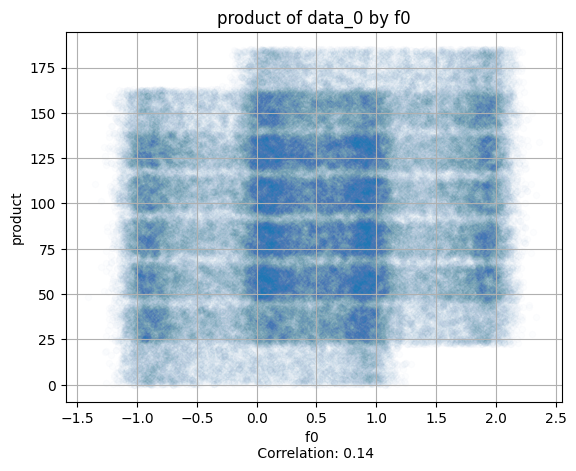

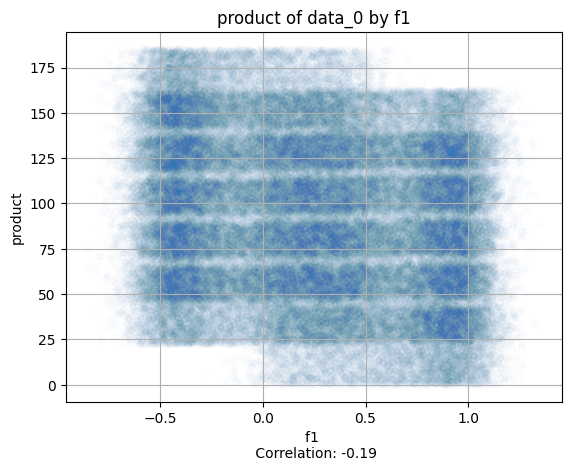

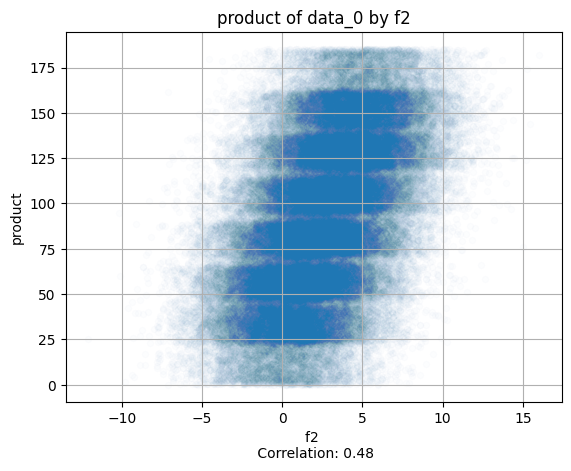

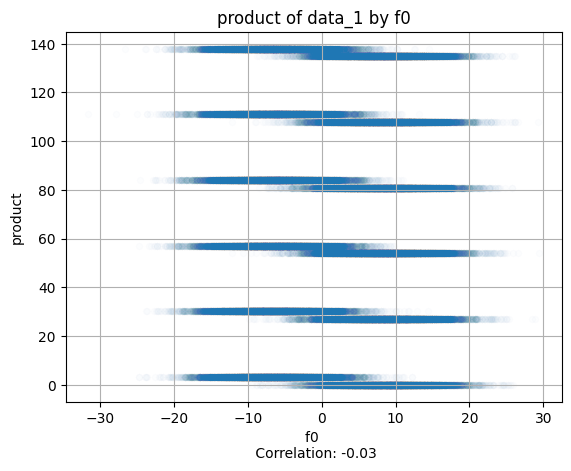

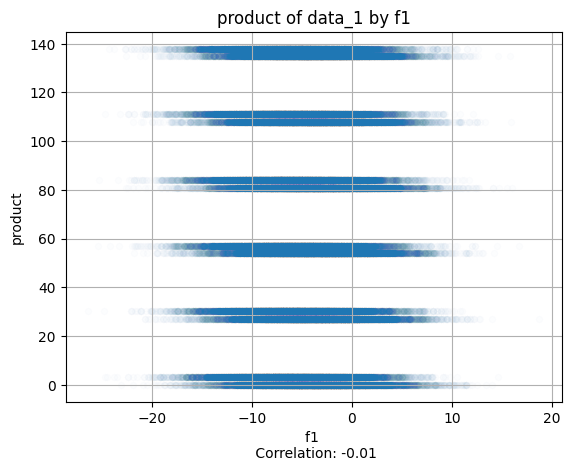

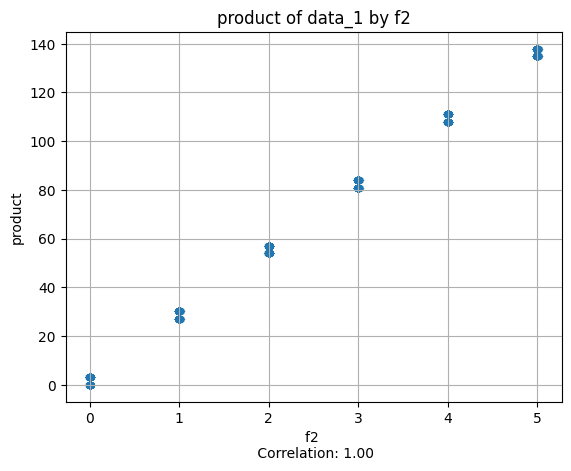

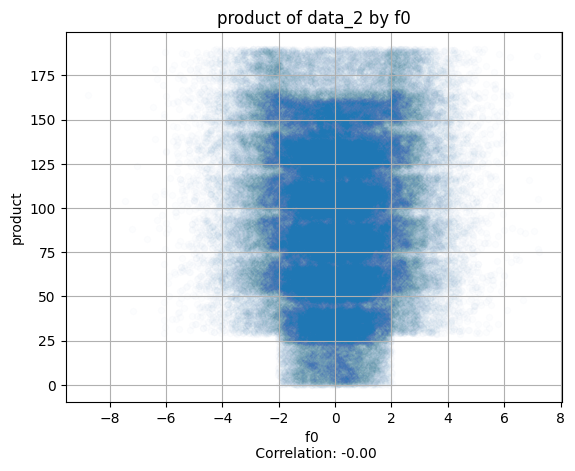

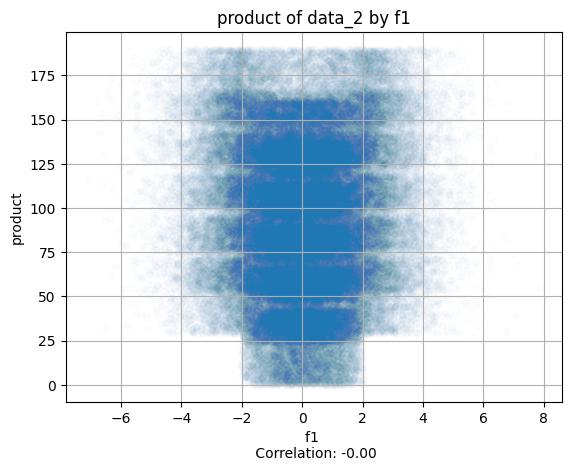

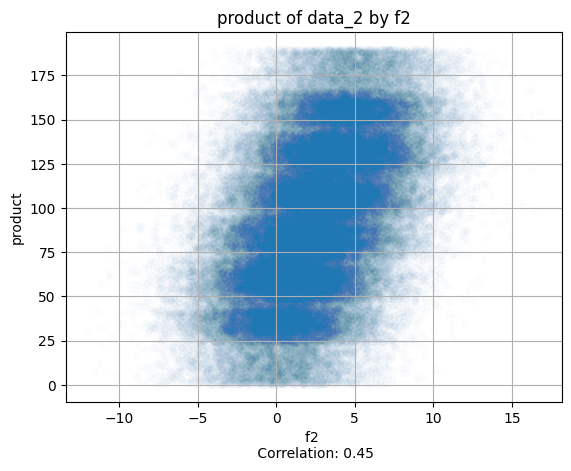

In [5]:
count = 0
for data in [data_0, data_1, data_2]:
    for column in data.drop(['product','id'], axis=1).columns:
        corr = data[column].corr(data['product'])
        data.plot(kind='scatter', 
                  title=f'product of data_{count} by {column}',
                  x=column, 
                  y='product', 
                  grid=True,
                  alpha=0.01,
                  xlabel=f'{column} \n Correlation: {"%.2f" % corr}',
                  ylabel='product')
    count += 1

## Model creation and testing
Since we will use linear regression and have three parameters, we will establish a third-order polynomial. We will process each set of data through 'for' function and put the results into dictionaries to automate the process.

In [6]:
poly = PolynomialFeatures(degree=3, include_bias=False)
predictions = {}
answers = {}
score = {}
rmse = {}
product = {}
count = 0
for data in [data_0, data_1, data_2]:
    features = data.drop(['product','id'], axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=state)
    features_train = poly.fit_transform(features_train)
    features_valid = poly.transform(features_valid)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    predictions[f'data_{count}'] = predictions_valid
    answers[f'data_{count}'] = target_valid
    score[f'data_{count}'] = model.score(features_valid,target_valid)
    rmse[f'data_{count}'] = mean_squared_error(target_valid,predictions_valid) ** 0.5
    product[f'data_{count}'] = predictions_valid.mean()
    count += 1

Let's make a table of the proximity of answers, the approximate average volume of wells and root-mean-square errors

In [7]:
table = pd.DataFrame([score, product, rmse])
table.index = ['score', 'product', 'rmse']
table.loc['product'] = table.loc['product']
table.round(3)

,data_0,data_1,data_2
score,0.285,1.000,0.253
product,92.305,68.866,95.062
rmse,37.432,0.776,38.592


## Calculation of profits and risks
All key values were saved automatically in dictionaries. Let's calculate the minimum volume of wells for break-even well development.

In [8]:
min_volume = round(wallet / income / pick, 2)
min_volume

111.11

The average well volumes are similar to the minimum and slightly less, this is due to the lack of sorting. Let's check this further.

In [10]:
profits = {}
for data in ['data_0', 'data_1', 'data_2']:
    profits_bs = []
    for i in range(1000):
        target_valid = pd.Series(answers[data]).reset_index(drop=True)
        predictions_valid = pd.Series(predictions[data]).reset_index(drop=True)
        # applying bootstrap and taking a subsample the size of our scouting points
        target_valid_subsample = target_valid.sample(scout, replace=True, random_state=state)
        predictions_valid_subsample = predictions_valid[target_valid_subsample.index].sort_values(ascending=False)
        # calculating profit depending on the number of points selected for development
        profit_bs = (target_valid_subsample[predictions_valid_subsample.index][:pick].sum() * income - wallet)
        profits_bs.append(profit_bs)
    profits[data] = profits_bs

profits_mean = pd.Series({key: f'{sum(profits[key])/len(profits[key]):.3e}' for key in profits.keys()})
profits_mean

data_0    4.821e+08
data_1    5.258e+08
data_2    5.848e+08
dtype: object

The discrepancy between the average volumes and the minimum did not prevent us from making a profit after sorting the wells. The third region turned out to be the most profitable

In [12]:
profits_quant = pd.DataFrame()
for key in list(profits.keys()):
    quantile_low = pd.Series(profits[key]).quantile((1-confidence_interval)/2)
    quantile_high = pd.Series(profits[key]).quantile(confidence_interval+(1-confidence_interval)/2)
    risk_percentile = stats.percentileofscore(profits[key], 0)
    is_acceptable = risk_percentile / 100 < risk

    data_con = pd.DataFrame({'low': f'{quantile_low:.3e}',
                     'high': f'{quantile_high:.3e}',
                     'risk': risk_percentile,
                     'acceptable?': is_acceptable}, index=[key])

    profits_quant = pd.concat([profits_quant, data_con])
profits_quant

,low,high,risk,acceptable?
data_0,-6.931e+07,1.031e+09,4.2,False
data_1,7.165e+07,9.830e+08,1.0,True
data_2,6.073e+07,1.104e+09,1.5,True


The third region did not exceed the risk and, since it is the most profitable, can be considered the most promising for development
## General conclusion
Analysis has shown the third region to be the most profitable for development. The second region has very anomalous data, the reliability and accuracy of which is worth checking. If the data is correct, a small increase in exploration points will put the second region firmly in first place in terms of profitability